In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import dataPrep as dp
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,r2_score


In [2]:
data = pd.read_csv('insurance.csv')

In [3]:
# Top 5 Rows
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
# Last 5 Rows
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
# Random 5 Rows
data.sample(5)

,age,sex,bmi,children,smoker,region,charges
337,62,male,27.550,1,no,northwest,13937.66650
1318,35,male,39.710,4,no,northeast,19496.71917
506,22,male,31.350,1,no,northwest,2643.26850
281,54,male,40.565,3,yes,northeast,48549.17835
980,54,male,25.460,1,no,northeast,25517.11363


In [7]:
data.shape

(1338, 7)

In [8]:
# chick Null values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
# Get all data about your dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
# Get the statistic about the data
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
# Number of uniqe values in each feature
for column in data.columns:
    print(data[column].nunique())

47
2
548
6
2
4
1337


In [12]:
# Knowing numerical data from data that we will do encode on it
str=[]
num=[]
for column in data.columns:
    if data[column].nunique() > 10:
        num.append(column)
    else:
        str.append(column)

In [13]:
num

['age', 'bmi', 'charges']

In [14]:
str

['sex', 'children', 'smoker', 'region']

<AxesSubplot: ylabel='region'>

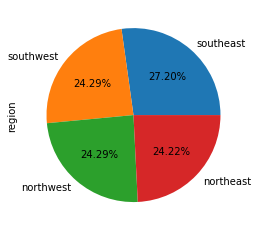

In [15]:
# Find the effect of region on Charges 
data['region'].value_counts().plot(kind="pie",autopct="%1.2f%%")

<AxesSubplot: >

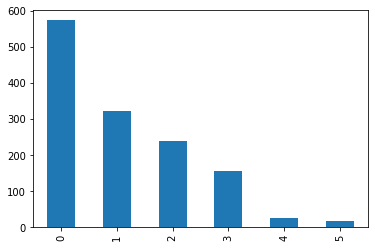

In [16]:
# Find Charges among Number of childrens
data['children'].value_counts().plot(kind="bar") 

<AxesSubplot: >

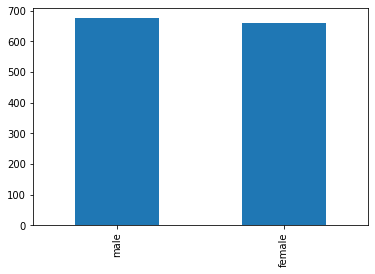

In [17]:
# The most influential gender on Charges
data['sex'].value_counts().plot(kind="bar")


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


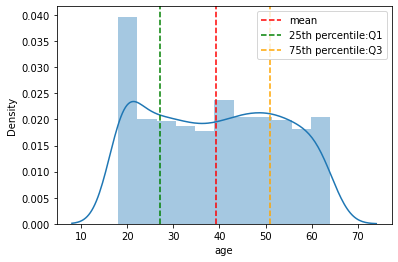

In [18]:
# the Numerical distribution of the age 
sns.distplot(data['age'])
plt.axvline(x=np.mean(data['age']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(data['age'],25),c='green', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(data['age'],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.legend()

The distribution of the age show that there are outlines in range of age (8-22) , 
mean =~ 39 , 
25th , 75th precentiles =~ 28 , 51 respectivly

In [19]:
data['age'].skew()

0.05567251565299186

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='age'>

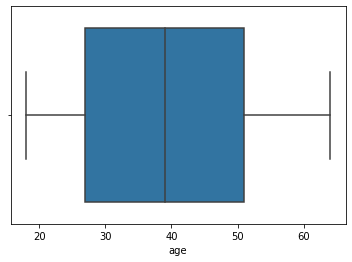

In [20]:
sns.boxplot(data['age'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='bmi', ylabel='Density'>

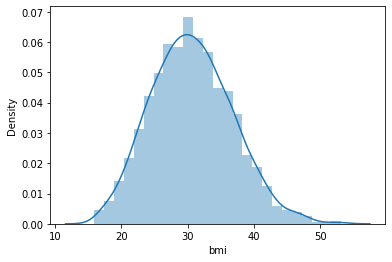

In [21]:
# the Numerical distribution of the bmi
sns.distplot(data['bmi'])

In [22]:
data['bmi'].skew()

0.2840471105987448

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='bmi'>

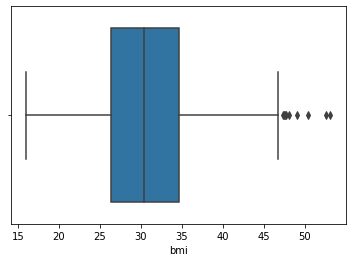

In [23]:
sns.boxplot(data['bmi'])

ther are outlines over than ~47  ,  25th,75th percentile =~ 26,35 

<AxesSubplot: xlabel='age', ylabel='charges'>

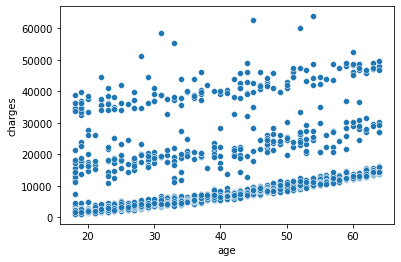

In [24]:
sns.scatterplot(x=data['age'],y=data['charges'])

<AxesSubplot: xlabel='smoker', ylabel='bmi'>

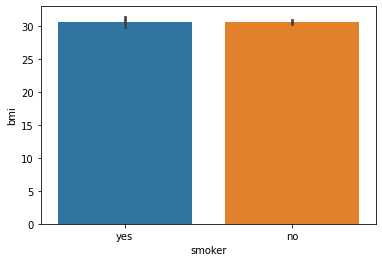

In [25]:
# the affect of if person smoker for bmi
sns.barplot(x=data['smoker'],y=data['bmi'])

No effect 

<AxesSubplot: xlabel='smoker', ylabel='age'>

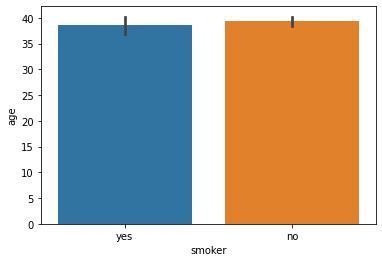

In [26]:
# relation bettwen if the person is smoker and age
sns.barplot(x=data['smoker'],y=data['age'])

<AxesSubplot: xlabel='smoker', ylabel='bmi'>

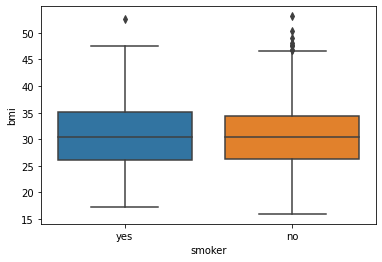

In [27]:
sns.boxplot(x=data['smoker'],y=data['bmi'])

In [28]:
# Relation bettwen Region and number od children 
pd.crosstab(data['region'],data['children'])

children,0,1,2,3,4,5
region,,,,,,
northeast,147,77,51,39,7,3
northwest,132,74,66,46,6,1
southeast,157,95,66,35,5,6
southwest,138,78,57,37,7,8


<AxesSubplot: xlabel='children', ylabel='region'>

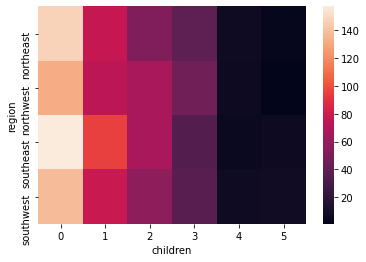

In [29]:
sns.heatmap(pd.crosstab(data['region'],data['children']))

In [30]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
# use this library to encode string data tonumbers

data['sex']=encoder.fit_transform(data['sex'])

data['smoker']=encoder.fit_transform(data['smoker'])

data['region']=encoder.fit_transform(data['region'])

# split the data to features and target to apply the regression

data_x=data.drop(['charges'],axis=1).values
data_y=data['charges'].values


print(data_x)
print(data_y)

[[19.    0.   27.9   0.    1.    3.  ]
 [18.    1.   33.77  1.    0.    2.  ]
 [28.    1.   33.    3.    0.    2.  ]
 ...
 [18.    0.   36.85  0.    0.    2.  ]
 [21.    0.   25.8   0.    0.    3.  ]
 [61.    0.   29.07  0.    1.    1.  ]]
[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


In [31]:
scaler = MinMaxScaler()

data_x=scaler.fit_transform(data_x)
data_y= scaler.fit_transform(data_y.reshape(-1,1))


# apply fit function on the data to get the y_pred of the model (charges)

model=LinearRegression()

model.fit(data_x, data_y)
y_pred=model.predict(data_x)

# get the score of the data and mean squared error of the model

score=r2_score(data_y,y_pred)
print('score : ',score)

mean_square_error=mean_squared_error(y_pred,data_y)
print('Mean square error : ',mean_square_error)



score :  0.7507372027994939
Mean square error :  0.00930678638832613


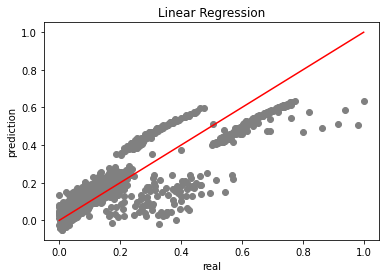

In [32]:
import matplotlib.pyplot as plt
# plot the graph to show how the data is contributed to the equation of the model
plt.scatter(data_y, y_pred, color='gray')
plt.plot([min(data_y), max(data_y)], [min(data_y), max(data_y)],color='red')
plt.xlabel('real')
plt.ylabel('prediction')
plt.title('Linear Regression')
plt.show()